In [2]:
import sys
from glob import glob

import zarr
import numpy as np
import pandas as pd

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#dataframe = pd.read_parquet(data_pdhrrr_dir+'grid_data_HRRR_d01_2020071200-0000.par', engine='pyarrow')

In [6]:
#dataframe.iloc[0:-1:1308]

In [7]:
#data = dataframe.values

In [8]:
#plt.plot(dataframe['torn_rptdist_2hr'].values[4:-1:1308])

In [9]:
from datetime import datetime, timedelta

In [10]:
filenames = sorted(glob(data_pdhrrr_dir+'*.par'))[:20]
var_inds = [1, 46, 52, 58, 64, 70, 76, 82, 88, 94, 100, 106, 112, 118, 124, 130, 136, 142, 148, 154, 160, 181]

In [11]:
dataframe = pd.read_parquet(filenames[0], engine='pyarrow')

In [12]:
dataframe

,fhr,SBCAPE,MLCAPE,SBCINH,MLCINH,UP_HELI_MAX,UP_HELI_MAX03,W_UP_MAX,W_DN_MAX,SRH01,...,wind_rptdist_2hr,torn_rptdist_0hr,torn_rptdist_1hr,torn_rptdist_2hr,sighail_rptdist_0hr,sighail_rptdist_1hr,sighail_rptdist_2hr,sigwind_rptdist_0hr,sigwind_rptdist_1hr,sigwind_rptdist_2hr
pt,,,,,,,,,,,,,,,,,,,,,
1,1,2369.600586,2298.772217,-35.689350,-36.720413,0.0,0.0,1.88539,-1.001420,-11.977220,...,949,-1,-1,2355,-1,-1,-1,-1,1063,1063
2,1,2956.582764,2805.591797,-4.542900,-4.565089,0.0,0.0,2.13539,-1.063920,10.741569,...,949,-1,-1,2365,-1,-1,-1,-1,1082,1082
3,1,2373.787109,1917.278076,-19.803255,-0.866864,4.0,1.2,12.69789,-1.438920,5.705621,...,834,-1,-1,3026,-1,-1,-1,-1,1688,1688
4,1,1444.201172,1261.567993,-18.655325,-14.286983,0.0,1.2,5.44789,-1.438920,18.580917,...,868,-1,-1,3077,-1,-1,-1,-1,1735,1735
5,1,2520.680420,2410.414307,-16.680473,-11.184911,0.0,0.9,1.82289,-0.938920,-21.568640,...,876,-1,-1,2267,-1,-1,-1,-1,969,969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,36,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.81250,-0.051172,-18.377367,...,3188,-1,-1,-1,-1,-1,-1,-1,-1,-1
1295,36,25.754438,34.704144,-19.556213,-15.813609,0.1,0.1,1.75000,-0.051172,-4.424408,...,3121,-1,-1,-1,-1,-1,-1,-1,-1,-1
1296,36,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.06250,-0.051172,-1.739053,...,3055,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [14]:
var_names = list(dataframe.columns)

for i, var_ in enumerate(var_names):
    print('{} - {}'.format(i, var_))

# for i in range(7):
#     print(var_names[var_inds[i]])

0 - fhr
1 - SBCAPE
2 - MLCAPE
3 - SBCINH
4 - MLCINH
5 - UP_HELI_MAX
6 - UP_HELI_MAX03
7 - W_UP_MAX
8 - W_DN_MAX
9 - SRH01
10 - SRH03
11 - SHR01
12 - SHR06
13 - CAPESHEAR
14 - T2
15 - TD2
16 - PSFC
17 - PREC_ACC_NC
18 - WSPD10MAX
19 - UP_HELI_MAX80
20 - UP_HELI_MAX120
21 - SBLCL
22 - STP
23 - U500
24 - V500
25 - T500
26 - TD500
27 - U700
28 - V700
29 - T700
30 - TD700
31 - U850
32 - V850
33 - T850
34 - TD850
35 - U925
36 - V925
37 - T925
38 - TD925
39 - LR75
40 - CREF
41 - GRPL_MAX
42 - HGT0C
43 - RVORT1
44 - MUCAPE
45 - UP_HELI_MAX-N3T1
46 - UP_HELI_MAX-N3T3
47 - UP_HELI_MAX-N3T5
48 - UP_HELI_MAX-N5T1
49 - UP_HELI_MAX-N5T3
50 - UP_HELI_MAX-N5T5
51 - UP_HELI_MAX03-N3T1
52 - UP_HELI_MAX03-N3T3
53 - UP_HELI_MAX03-N3T5
54 - UP_HELI_MAX03-N5T1
55 - UP_HELI_MAX03-N5T3
56 - UP_HELI_MAX03-N5T5
57 - RVORT1-N3T1
58 - RVORT1-N3T3
59 - RVORT1-N3T5
60 - RVORT1-N5T1
61 - RVORT1-N5T3
62 - RVORT1-N5T5
63 - W_UP_MAX-N3T1
64 - W_UP_MAX-N3T3
65 - W_UP_MAX-N3T5
66 - W_UP_MAX-N5T1
67 - W_UP_MAX-N5T3
68 - W

In [12]:
[
175 - hailone_rptdist_2hr
178 - wind_rptdist_2hr
181 - torn_rptdist_2hr
]

['fhr',
 'SBCAPE',
 'MLCAPE',
 'SBCINH',
 'MLCINH',
 'UP_HELI_MAX',
 'UP_HELI_MAX03',
 'W_UP_MAX',
 'W_DN_MAX',
 'SRH01',
 'SRH03',
 'SHR01',
 'SHR06',
 'CAPESHEAR',
 'T2',
 'TD2',
 'PSFC',
 'PREC_ACC_NC',
 'WSPD10MAX',
 'UP_HELI_MAX80',
 'UP_HELI_MAX120',
 'SBLCL',
 'STP',
 'U500',
 'V500',
 'T500',
 'TD500',
 'U700',
 'V700',
 'T700',
 'TD700',
 'U850',
 'V850',
 'T850',
 'TD850',
 'U925',
 'V925',
 'T925',
 'TD925',
 'LR75',
 'CREF',
 'GRPL_MAX',
 'HGT0C',
 'RVORT1',
 'MUCAPE',
 'UP_HELI_MAX-N3T1',
 'UP_HELI_MAX-N3T3',
 'UP_HELI_MAX-N3T5',
 'UP_HELI_MAX-N5T1',
 'UP_HELI_MAX-N5T3',
 'UP_HELI_MAX-N5T5',
 'UP_HELI_MAX03-N3T1',
 'UP_HELI_MAX03-N3T3',
 'UP_HELI_MAX03-N3T5',
 'UP_HELI_MAX03-N5T1',
 'UP_HELI_MAX03-N5T3',
 'UP_HELI_MAX03-N5T5',
 'RVORT1-N3T1',
 'RVORT1-N3T3',
 'RVORT1-N3T5',
 'RVORT1-N5T1',
 'RVORT1-N5T3',
 'RVORT1-N5T5',
 'W_UP_MAX-N3T1',
 'W_UP_MAX-N3T3',
 'W_UP_MAX-N3T5',
 'W_UP_MAX-N5T1',
 'W_UP_MAX-N5T3',
 'W_UP_MAX-N5T5',
 'W_DN_MAX-N3T1',
 'W_DN_MAX-N3T3',
 'W_DN_MAX

In [ ]:
singwind sighail

In [13]:
base_v3_s = datetime(2018, 7, 15)
base_v3_e = datetime(2020, 12, 2)

base_v4_s = datetime(2020, 12, 3)
base_v4_e = datetime(2022, 7, 15)

base_ref = datetime(2010, 1, 1)

ref_v3 = (base_v3_e - base_ref).days

var_inds = [1, 46, 64, 76, 88, 106, 181]
filenames = sorted(glob(data_pdhrrr_dir+'*.par'))[:20]

N_var = len(var_inds)
N_grids = 1308
N_leads = 18
N_files = len(filenames)
N_samples = N_files*N_grids
N_cut = N_grids*N_leads

months = [2, 3, 4, 5, 6, 7, 8, 9, 10]

data_pos_v3 = np.empty((N_samples, N_leads, N_var))
data_neg_v3 = np.empty((N_samples, N_leads, N_var))
data_pos_v4 = np.empty((N_samples, N_leads, N_var))
data_neg_v4 = np.empty((N_samples, N_leads, N_var))

count_pos_v3 = 0
count_neg_v3 = 0
count_pos_v4 = 0
count_neg_v4 = 0

for i, filename in enumerate(filenames):
    
    dt_sring = filename[-19:-11]
    dt_ = datetime.strptime(dt_sring, '%Y%m%d')
    flag_v3 = (dt_ - base_ref).days < ref_v3
    
    if dt_.month in months is False:
        continue;
    else:
        dataframe = pd.read_parquet(filename, engine='pyarrow')
    
    if len(dataframe) < N_cut:
        continue;
    else:
        data = dataframe.values[:N_cut, var_inds]
    
    if flag_v3:
        for n in range(N_grids-1):
            data_slice = data[n:-1:1308, :]

            if np.max(data_slice[:, -1])>0 and np.max(data_slice[:, -1])<= 4000:
                data_pos_v3[count_pos_v3, ...] = data_slice
                count_pos_v3 += 1
            else:
                data_neg_v3[count_neg_v3, ...] = data_slice
                count_neg_v3 += 1
                
    else:
        for n in range(N_grids-1):
            data_slice = data[n:-1:1308, :]

            if np.max(data_slice[:, -1])>0 and np.max(data_slice[:, -1])<= 4000:
                data_pos_v4[count_pos_v4, ...] = data_slice
                count_pos_v4 += 1
            else:
                data_neg_v4[count_neg_v4, ...] = data_slice
                count_neg_v4 += 1   

In [10]:
data_pos_v3 = data_pos_v3[:count_pos_v3, ...]
data_neg_v3 = data_neg_v3[:count_neg_v3, ...]

data_pos_v4 = data_pos_v4[:count_pos_v4, ...]
data_neg_v4 = data_neg_v4[:count_neg_v4, ...]

zarr.save(save_dir_scratch+'HRRR_clean_pos_v3.zarr', data_pos_v3)
zarr.save(save_dir_scratch+'HRRR_clean_neg_v3.zarr', data_neg_v3)

zarr.save(save_dir_scratch+'HRRR_clean_pos_v4.zarr', data_pos_v4)
zarr.save(save_dir_scratch+'HRRR_clean_neg_v4.zarr', data_neg_v4)

In [9]:
data_pos_v3 = zarr.load(save_dir_scratch+'HRRR_clean_pos_v3.zarr')
data_neg_v3 = zarr.load(save_dir_scratch+'HRRR_clean_neg_v3.zarr')

data_pos_v4 = zarr.load(save_dir_scratch+'HRRR_clean_pos_v4.zarr')
data_neg_v4 = zarr.load(save_dir_scratch+'HRRR_clean_neg_v4.zarr')

In [10]:
data_pos_v3.shape

(621683, 18, 7)

In [11]:
data_neg_v3.shape

(651335, 18, 7)

In [12]:
data_pos_v4.shape

(1571762, 18, 7)

In [13]:
data_neg_v4.shape

(2355773, 18, 7)

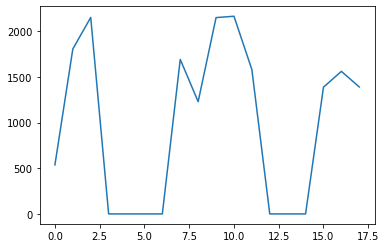

In [22]:
plt.plot(data_pos_v3[5000, :, -1])

In [60]:

var_names = list(dataframe.columns)

for i, var_ in enumerate(var_names):
    print('{} - {}'.format(i, var_))

0 - fhr
1 - SBCAPE
2 - MLCAPE
3 - SBCINH
4 - MLCINH
5 - UP_HELI_MAX
6 - UP_HELI_MAX03
7 - W_UP_MAX
8 - W_DN_MAX
9 - SRH01
10 - SRH03
11 - SHR01
12 - SHR06
13 - CAPESHEAR
14 - T2
15 - TD2
16 - PSFC
17 - PREC_ACC_NC
18 - WSPD10MAX
19 - UP_HELI_MAX80
20 - UP_HELI_MAX120
21 - SBLCL
22 - STP
23 - U500
24 - V500
25 - T500
26 - TD500
27 - U700
28 - V700
29 - T700
30 - TD700
31 - U850
32 - V850
33 - T850
34 - TD850
35 - U925
36 - V925
37 - T925
38 - TD925
39 - LR75
40 - CREF
41 - GRPL_MAX
42 - HGT0C
43 - RVORT1
44 - MUCAPE
45 - UP_HELI_MAX-N3T1
46 - UP_HELI_MAX-N3T3
47 - UP_HELI_MAX-N3T5
48 - UP_HELI_MAX-N5T1
49 - UP_HELI_MAX-N5T3
50 - UP_HELI_MAX-N5T5
51 - UP_HELI_MAX03-N3T1
52 - UP_HELI_MAX03-N3T3
53 - UP_HELI_MAX03-N3T5
54 - UP_HELI_MAX03-N5T1
55 - UP_HELI_MAX03-N5T3
56 - UP_HELI_MAX03-N5T5
57 - RVORT1-N3T1
58 - RVORT1-N3T3
59 - RVORT1-N3T5
60 - RVORT1-N5T1
61 - RVORT1-N5T3
62 - RVORT1-N5T5
63 - W_UP_MAX-N3T1
64 - W_UP_MAX-N3T3
65 - W_UP_MAX-N3T5
66 - W_UP_MAX-N5T1
67 - W_UP_MAX-N5T3
68 - W